<a href="https://colab.research.google.com/github/an0407/ML_Projects/blob/main/MLP_Project/MLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# **LOADING THE DATASET**

In [ ]:
# Loading data
df = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')
print("datasets loaded successfully")

datasets loaded successfully


# **EDA**

**DATASET SHAPE**

In [ ]:
#shape of the dataset
print(f"Dataset shape:",df.shape)

Dataset shape: (100000, 76)


**BASIC INFO OF DATASET**

In [ ]:
# Displaying basic information
print("Training Data Overview:")
print(df.info(),"\n\n")
print(df.describe(),"\n\n")

print("\nTest Data Overview:")
print(test_data.info())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  Has

**UNIQUE VALUES IN EACH COLUMN**

In [ ]:
# Display all columns in output
pd.set_option('display.max_rows', None)

# Print unique values per column
print("unique values in training data: \n")
print(df.nunique(),"\n")
print("Unique values in test data: \n")
print(test_data.nunique())

unique values in training data: 

MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   6
IsPassiveModeEnabled                      2
AntivirusConfigID                      1976
NumAntivirusProductsInstalled             5
NumAntivirusProductsEnabled               5
HasTpm                                    2
CountryID                               220
CityID                                16047
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease                      

**MISSIING VALUES IN BOTH TRAINING AND TEST DATA**

In [ ]:
# Display all columns in output
pd.set_option('display.max_rows()', None)

# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values in Training Data:")
print(missing_values)

missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
print("\nMissing Values in Test Data:")
print(missing_values_test)


Missing Values in Training Data:
SMode                                 981
CityID                                623
IsGamer                               559
RegionIdentifier                      559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
SystemVolumeCapacityMB                110
PrimaryDiskCapacityMB                 110
IEVersionID                           107
ProcessorModelID                       85
ProcessorManufacturerID                85
ProcessorCoreCount                     85
AntivirusConfigID                      76
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
N

**DETECTING OUTLIERS IN NUMERICAL FEATURES**

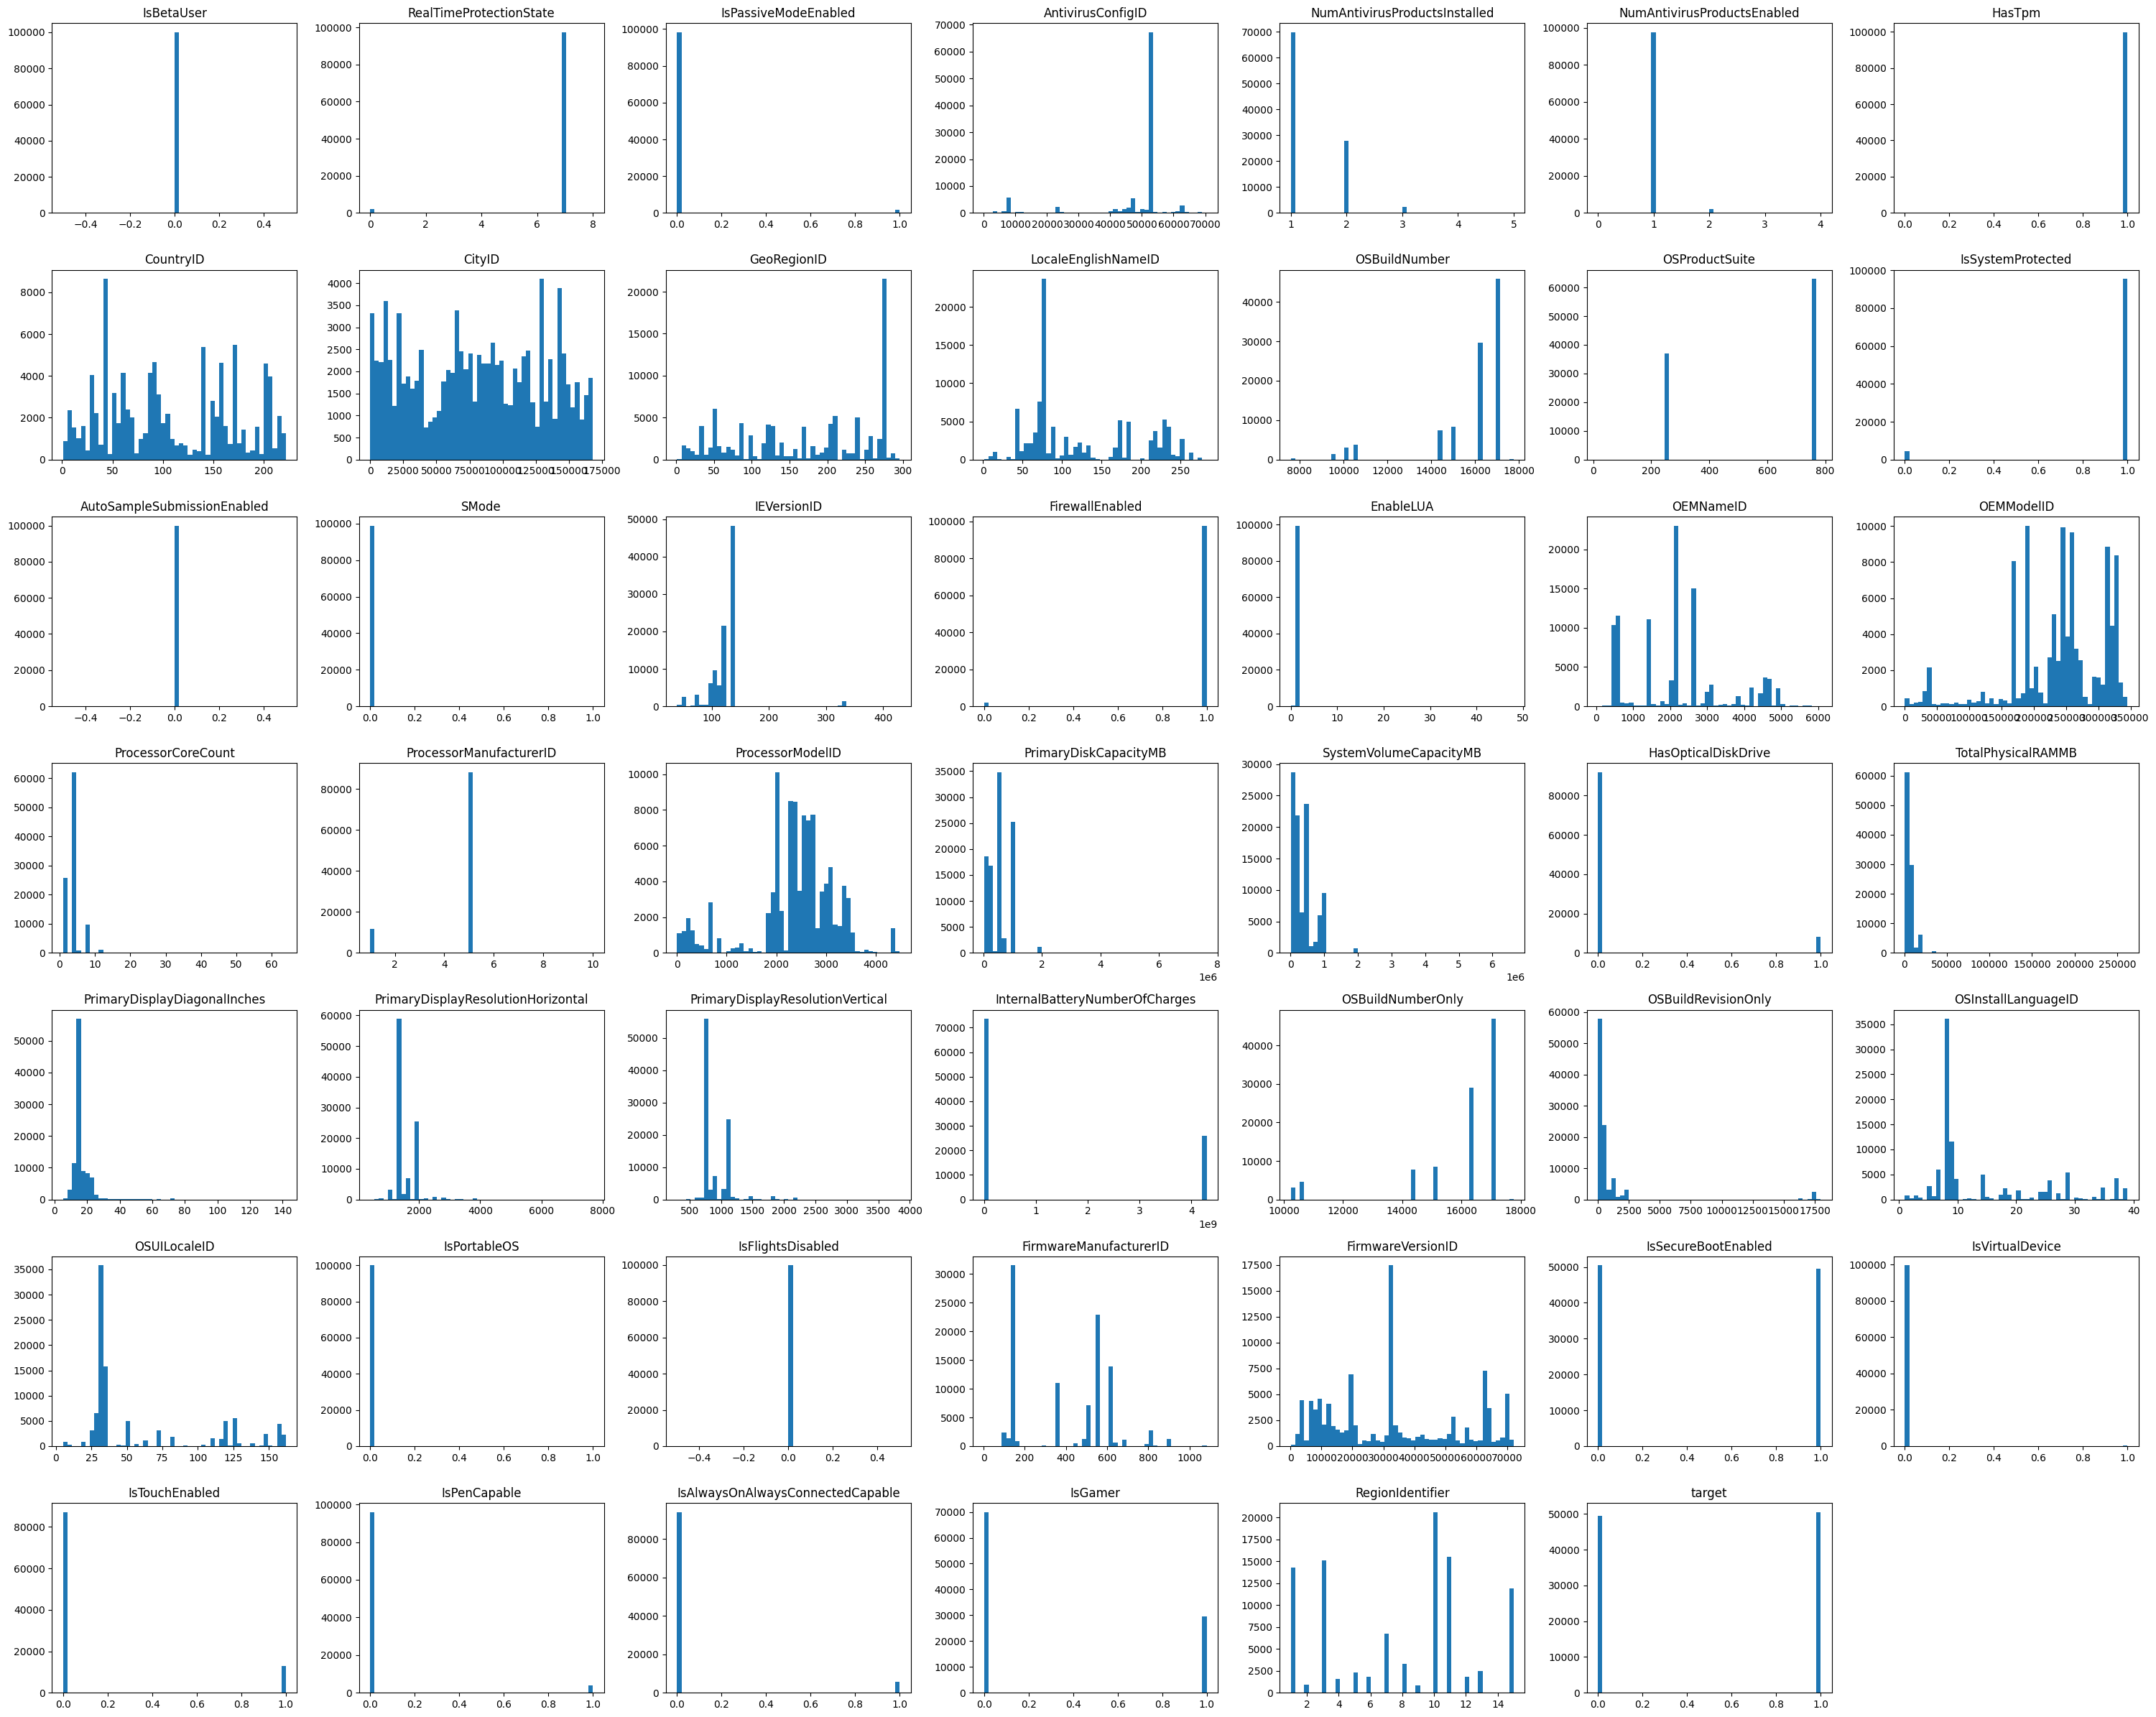

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(30, 24), bins=50, grid=False)
plt.tight_layout()
plt.show()

**INSIGHT**: SOME FEATURES SEEM TO HAVE OUTLIERS FROM THE HISTOGRAMS!

**DETECTING OUTLIER FEATURES USING THE IQR METHOD**

In [ ]:
# Identify outliers using the IQR method
outlier_features = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 #Inter quartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    if outliers > 0:
        outlier_features.append(col)

print("Features with outliers:", outlier_features)
df.shape

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

Features with outliers: ['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSBuildNumber', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

(100000, 76)

**INSIGHT:** From the IQR Method, the following features have outliers:

Features with outliers: ['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSBuildNumber', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable']


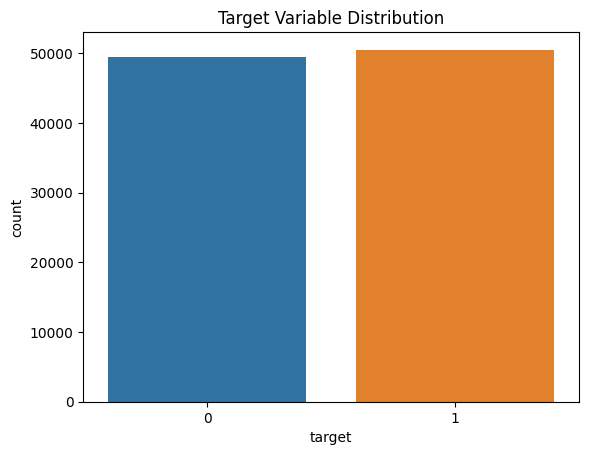

In [ ]:
# Visualizing target variable distribution
sns.countplot(x=df['target'])
plt.title("Target Variable Distribution")
plt.show()


# **DATA PREPROCESSING**

**1) CAPPING OUTLIERS**

In [ ]:
# List of features with outliers
outlier_features = ['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
                    'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm',
                    'OSBuildNumber', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled',
                    'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
                    'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
                    'SystemVolumeCapacityMB', 'HasOpticalDiskDrive','TotalPhysicalRAMMB',
                    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
                    'PrimaryDisplayResolutionVertical', 'OSBuildNumberOnly', 'OSBuildRevisionOnly',
                    'OSInstallLanguageID','OSUILocaleID', 'IsPortableOS', 'IsVirtualDevice',
                    'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable']

# Function to cap the outlisers to lower or upper bound respectively
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace values beyond bounds with the respective limits
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply outlier capping
df_cleaned = cap_outliers(df, outlier_features)
df=df_cleaned
df.shape

NameError: name 's' is not defined

**2) HANDLING MISSING VALUES**

In [ ]:
# Handle missing values
df = df.dropna(subset=['target'])

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('target', errors='ignore')
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])
test_data[num_cols] = imputer_num.transform(test_data[num_cols])

# Impute categorical columns with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
test_data[cat_cols] = imputer_cat.transform(test_data[cat_cols])

print("Missing values handled successfully!")

Missing values handled successfully!


**3) FEATURE ENGINEERING**

In [ ]:
# Convert date columns to month
if 'DateAS' in df.columns:
    df['DateAS'] = pd.to_datetime(df['DateAS']).dt.month
    test_data['DateAS'] = pd.to_datetime(test_data['DateAS']).dt.month
if 'DateOS' in df.columns:
    df['DateOS'] = pd.to_datetime(df['DateOS']).dt.month
    test_data['DateOS'] = pd.to_datetime(test_data['DateOS']).dt.month


#convert the system capacity to 5 categories based on size
# Define bins and labels
bins = [0, 127000, 255000, 511000, 1270000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply binning
df['StorageCategory'] = pd.cut(df['SystemVolumeCapacityMB'], bins=bins, labels=labels)
test_data['StorageCategory'] = pd.cut(test_data['SystemVolumeCapacityMB'], bins=bins, labels=labels)
df.drop(columns=['SystemVolumeCapacityMB'], inplace=True)
test_data.drop(columns=['SystemVolumeCapacityMB'], inplace=True)



print("Featured engineering completed successfully!")




Featured engineering completed successfully!


**4) SCALING NUMERICAL FEATURES**

In [ ]:
# Scale numerical features
scaler = StandardScaler()

#defining numerical columns again
numer_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('target', errors='ignore')

df[numer_cols] = scaler.fit_transform(df[numer_cols])
test_data[numer_cols] = scaler.transform(test_data[numer_cols])

print("Numerical features scaled successfully!")

Numerical features scaled successfully!


**5) LABEL ENCODING**

In [ ]:
# Label encoding
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
cate_cols=[]
for col in categorical_cols:
    cate_cols.append(col)
cate_cols.append('StorageCategory')

for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])
    test_data[col] = test_data[col].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1)

print("Label encoding done succesfully!")

Label encoding done succesfully!


**6) DIVIDING DATASET INTO FEATURES AND TARGET**

In [ ]:
# Define features and target
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features and Targets, defined Successfully!")

Features and Targets, defined Successfully!


# **Comparing The Performance of 3 Models**

**1) accuracy, precision, recall, F1-score, ROC-AUC**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Train and predict with three models
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='error')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    }

# Convert results to DataFrame for better visualization
df_results = pd.DataFrame(results).T
print(df_results)

                              Accuracy  Precision    Recall  F1 Score  \
Gradient Boosting Classifier   0.62015   0.608733  0.698281  0.650439   
Random Forest                  0.61310   0.613719  0.635546  0.624442   
XGBoost                        0.61880   0.616229  0.654219  0.634656   

                               ROC-AUC  
Gradient Boosting Classifier  0.664790  
Random Forest                 0.657902  
XGBoost                       0.663732  


**INSIGHT:** The best model is Gradient Boosting Classifier as it has the highest **Accuracy, Recall, F1 Score, ROC-AUC score**. GBC having the least precision among the 3 suggests that, it concentrates more on generating true positives more than avoiding false positives.

**2) CONFUSION MATRIX**

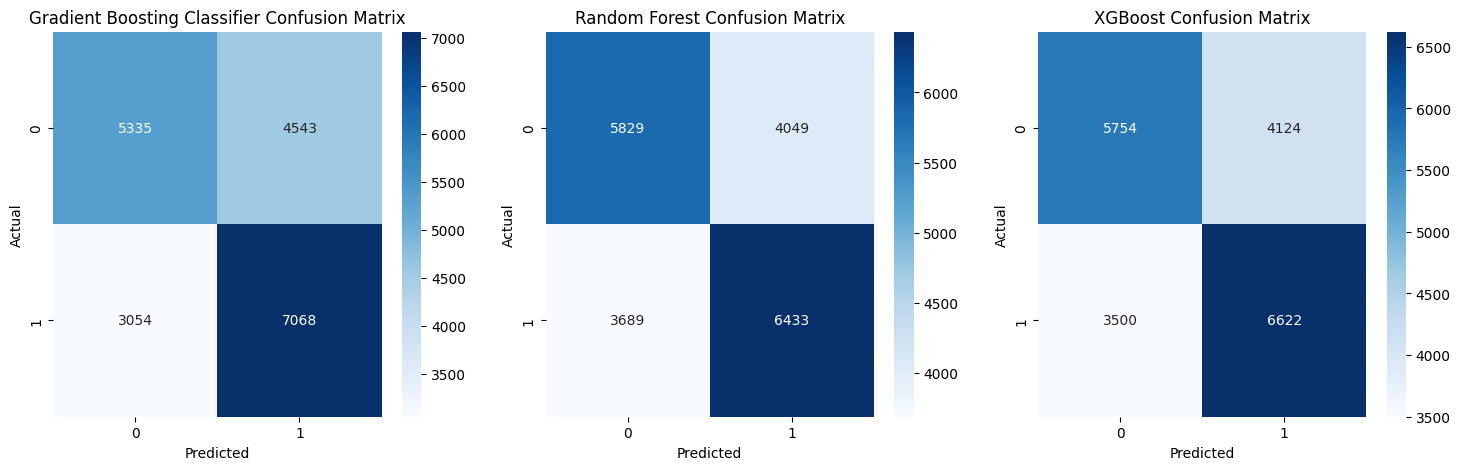

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()


**INSIGHT:** The previous insight is confirmed after seeing in the confusion matrices that GBC has a high False positive rate, that is 3054/(3054+5335) ~ 0.364

**3) ROC CURVES**

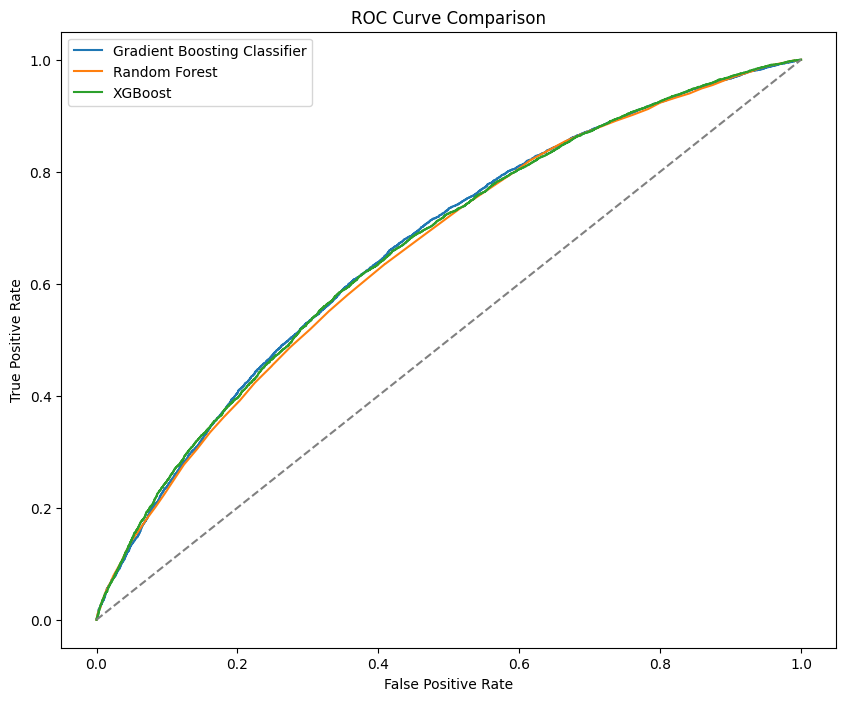

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


**INSIGHT:** Altough the ROC curves for all 3 models seem very similar, when closely looked at, by a slight margin, the GBC's curve (Blue line), has the highest AUC. This is also in accordance with the results of the previous cells!

**So after the comboned results of the 3 evaluation metrics used,** ***"Gradient Boosting Classifier"*** **performed the best, So I am proceeding with Hyper-parameter Tuning for this model**

# **MODEL BUILDING**

**HPT FOR BEST MODEL: Gradient Boosting Classifier:**

In [ ]:
# Use a subset for quicker hyperparameter tuning
X_train_sample = X_train.sample(50000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

#Fixing hyperparamter values for Gradient Boosting Classifier
param_dist_gbc = {
    'n_estimators': [300, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
    'subsample': [0.7, 0.8],
    'max_features': [0.7, 0.8]
}

#initializing model GBC
gbc = GradientBoostingClassifier()

#defining Randomized search CV with the right values
randomized_search_gbc = RandomizedSearchCV(gbc, param_dist_gbc, cv=3, scoring='accuracy',
                        n_jobs=-1, verbose=1, n_iter=10, random_state=42)

#fitting the Hyperparameter tuned model on the training subsets to find the best parameters
randomized_search_gbc.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [4, 5],
                                        'max_features': [0.7, 0.8],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [300, 400],
                                        'subsample': [0.7, 0.8]},
                   random_state=42, scoring='accuracy', verbose=1)

**TRAINING AND EVALUATING MODEL 1:**

In [ ]:
# Train final Gradient Boosting model with best parameters
best_params_gbc = randomized_search_gbc.best_params_
model = GradientBoostingClassifier(**best_params_gbc)
model.fit(X_train, y_train)


# # Evaluating model
y_pred = model.predict(X_test)
print("Gradient Boosting Classifier Performance:")
print(classification_report(y_test, y_pred, digits=4))

Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0     0.6336    0.5690    0.5996      9878
           1     0.6175    0.6789    0.6467     10122

    accuracy                         0.6247     20000
   macro avg     0.6256    0.6240    0.6232     20000
weighted avg     0.6255    0.6247    0.6235     20000



**MODEL 2**

In [ ]:
# Model 2: Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf, digits=4))



Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0     0.6124    0.5901    0.6011      9878
           1     0.6137    0.6355    0.6244     10122

    accuracy                         0.6131     20000
   macro avg     0.6131    0.6128    0.6127     20000
weighted avg     0.6131    0.6131    0.6129     20000



**MODEL 3**

In [ ]:
# Model 3: XGBoost Classifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='error')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb, digits=4))

XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0     0.6218    0.5825    0.6015      9878
           1     0.6162    0.6542    0.6347     10122

    accuracy                         0.6188     20000
   macro avg     0.6190    0.6184    0.6181     20000
weighted avg     0.6190    0.6188    0.6183     20000



**CREATING SUBMISSION FILE WITH THE PREDICTIONS OF THE GBC MODEL:**

In [ ]:
# Generating test predictions with the best model
test_predictions = model.predict(test_data)
submission = sample_submission.copy()
submission['target'] = test_predictions
submission.to_csv('submission.csv', index=False)
print("Submission file created.")

Submission file created.
